In [1]:
import jax
import jax.numpy as jnp 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
key = jax.random.PRNGKey(0)
k1, k2, k3 = jax.random.split(key, 3)
n, d = 1000, 1 
features = jax.random.normal(k1, shape=(n, d))
causal = jax.random.bernoulli(k2, shape=(n, 1)).astype('float32')
outcome = causal * features + jax.random.normal(k3, shape=(n, 1))
print(features.shape, causal.shape, outcome.shape)

2024-04-17 12:52:13.287922: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


(1000, 1) (1000, 1) (1000, 1)


In [3]:
df = pd.DataFrame({'features': np.array(features).reshape(-1,),
                   'causal': np.array(causal).reshape(-1,), 
                   'outcome': np.array(outcome).reshape(-1,)})

df.to_csv('mse_data.csv', index=False)

In [4]:
df.head()

,features,causal,outcome
0,0.485547,1.0,0.664031
1,-0.332440,1.0,-2.232699
2,0.760022,1.0,0.631910
3,1.240658,1.0,-0.812464
4,-0.856456,1.0,-2.146856


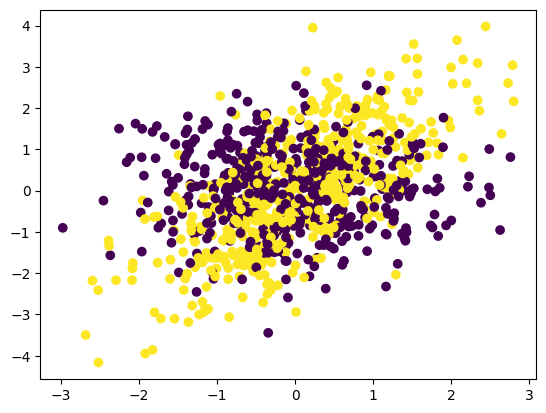

In [5]:
plt.scatter(features, outcome, c=causal)
plt.show()